In [2]:
import fastai
import numpy as np
import pandas as pd
import torch
# import tsai
 
import matplotlib.pyplot as plt

from Quick.cleaning.loading import (
    examine_dataset,
    remove_infs_and_nans
)

from Quick.cleaning.utils import (
    get_file_path
)

from Quick.runners.deep import (
    run_deep_nn_experiment
)

from Quick.runners.residual import (
    run_residual_deep_nn_experiment
)

from Quick.runners.sk import (
    run_sk_experiment
)

from Quick.runners.torch import (
    run_torch_nn_experiment
)

from Quick.constants import *

In [3]:
import torch.nn as nn
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

True
True


In [4]:
data_path_1: str = './data/'
data_path_2: str = './data/03-11/'
data_sets_1: list = [
    'Darknet_experiments_base.csv',
    'airline-passengers.csv',
]
data_sets_2: list = [
    'Syn.csv',
]

file_path_1: callable = get_file_path(data_path_1)
file_path_2: callable = get_file_path(data_path_2)
file_set_1: list = list(map(file_path_1, data_sets_1))
file_set_2: list = list(map(file_path_2, data_sets_2))
current_job: int = 0

# dataset_1 = examine_dataset(0, file_set_1, data_sets_1)
dataset_2 = examine_dataset(1, file_set_1, data_sets_1)
# dataset_3 = examine_dataset(0, file_set_2, data_sets_2)

Dataset 1/2: We now look at ./data/Darknet_experiments_base.csv


Loading Dataset: ./data/Darknet_experiments_base.csv
	To Dataset Cache: ./cache/Darknet_experiments_base.csv.pickle


        File:				./data/Darknet_experiments_base.csv  
        Job Number:			1
        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    


In [5]:
df = time_series_1 = dataset_1['Dataset']
df.shape

(144, 2)

In [6]:
time_series_1 = dataset_1['Dataset'][['Passengers']].values.astype('float32')

In [7]:
time_series_1.shape

(144, 1)

In [8]:
df.values

array([['1949-01', 112],
       ['1949-02', 118],
       ['1949-03', 132],
       ['1949-04', 129],
       ['1949-05', 121],
       ['1949-06', 135],
       ['1949-07', 148],
       ['1949-08', 148],
       ['1949-09', 136],
       ['1949-10', 119],
       ['1949-11', 104],
       ['1949-12', 118],
       ['1950-01', 115],
       ['1950-02', 126],
       ['1950-03', 141],
       ['1950-04', 135],
       ['1950-05', 125],
       ['1950-06', 149],
       ['1950-07', 170],
       ['1950-08', 170],
       ['1950-09', 158],
       ['1950-10', 133],
       ['1950-11', 114],
       ['1950-12', 140],
       ['1951-01', 145],
       ['1951-02', 150],
       ['1951-03', 178],
       ['1951-04', 163],
       ['1951-05', 172],
       ['1951-06', 178],
       ['1951-07', 199],
       ['1951-08', 199],
       ['1951-09', 184],
       ['1951-10', 162],
       ['1951-11', 146],
       ['1951-12', 166],
       ['1952-01', 171],
       ['1952-02', 180],
       ['1952-03', 193],
       ['1952-04', 181],


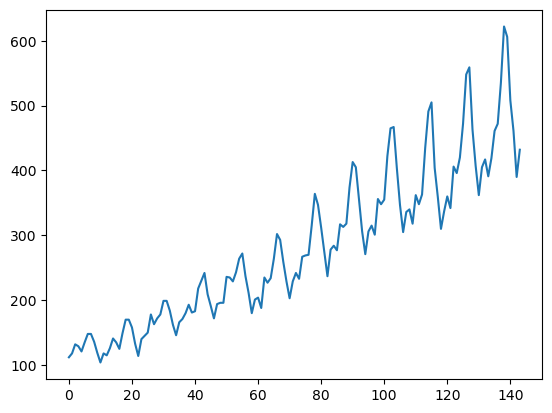

In [9]:
plt.plot(time_series_1)
plt.show()

In [10]:
# train-test split for time series
train_size = int(len(time_series_1) * 0.67)
test_size = len(time_series_1) - train_size
train, test = time_series_1[:train_size], time_series_1[train_size:]

In [11]:
def create_dataset(dataset, lookback, device):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X, device = device), torch.tensor(y, device = device)

In [13]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback, device = device)
X_test, y_test = create_dataset(test, lookback=lookback, device = device)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95, 1, 1]) torch.Size([95, 1, 1])
torch.Size([47, 1, 1]) torch.Size([47, 1, 1])


/var/folders/gc/jb6dhmdd3r37x6bvx8rw9w980000gn/T/ipykernel_75785/2532977903.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343686209/work/torch/csrc/utils/tensor_new.cpp:248.)
  return torch.tensor(X, device = device), torch.tensor(y, device = device)


In [19]:
lookback = 10
X_train, y_train = create_dataset(train, lookback=lookback, device = device)
X_test, y_test = create_dataset(test, lookback=lookback, device = device)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

for i in range(1, 10):
    print(X_train[i], y_train[i])

torch.Size([86, 10, 1]) torch.Size([86, 10, 1])
torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
tensor([[118.],
        [132.],
        [129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.]], device='mps:0') tensor([[132.],
        [129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.]], device='mps:0')
tensor([[132.],
        [129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.]], device='mps:0') tensor([[129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.],
        [115.]], device='mps:0')
tensor([[129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.],
        [115.]], device='mps:0') tensor([[121.],
   

In [21]:
import torch.nn as nn
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [22]:
class AirModel(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True, device = device)
        self.linear = nn.Linear(50, 1, device = device)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [24]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel(device)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train)
        y_test_pred = model(X_test)
        cpu_y_train_pred = y_train_pred.cpu()
        cpu_y_train = y_train.cpu()
        cpu_y_test_pred = y_test_pred.cpu()
        cpu_y_test = y_test.cpu()

        print(cpu_y_train_pred.shape, cpu_y_train.shape, cpu_y_test_pred.shape, cpu_y_test.shape)

        train_rmse = np.sqrt(loss_fn(cpu_y_train_pred, cpu_y_train))
        test_rmse = np.sqrt(loss_fn(cpu_y_test_pred, cpu_y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 0: train RMSE 222.7814, test RMSE 419.0745
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 100: train RMSE 176.1330, test RMSE 370.4943
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 200: train RMSE 139.9925, test RMSE 331.5317
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 300: train RMSE 109.9753, test RMSE 296.9651
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 400: train RMSE 87.2823, test RMSE 266.9706
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 500: train RMSE 65.2312, test RMSE 235.3875
torch.Size([86, 10, 1]) torch.Size([86, 10, 1]) torch.Size([38, 10, 1]) torch.Size([38, 10, 1])
Epoch 600: train RMSE 49.9

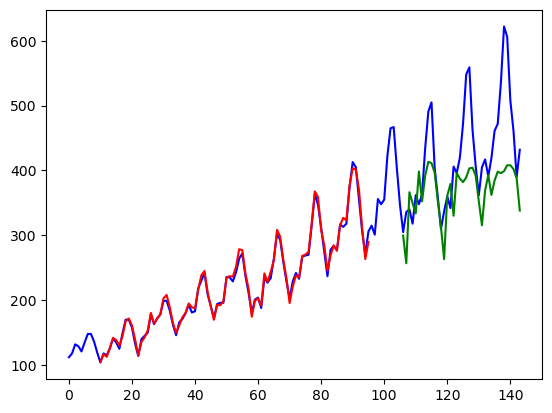

In [26]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(time_series_1) * np.nan
    y_pred = model(X_train).cpu().numpy()
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :].cpu().numpy()
    # shift test predictions for plotting
    test_plot = np.ones_like(time_series_1) * np.nan
    test_plot[train_size+lookback:len(time_series_1)] = model(X_test)[:, -1, :].cpu().numpy()
# plot
plt.plot(time_series_1, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
samples = 6
variables = 6
test_vals = torch.cat(
    [torch.linspace(0, 1, variables).reshape(1, -1) for _ in range(samples)],
    dim=0
)
timesteps = 2
# test_vals = torch.randn(samples, variables)
print(test_vals)
# we want to compile this into a time series of shape (samples/timesteps, variables, timesteps)
test_vals_2 = torch.cat(
    [test_vals[i:i+timesteps].permute(1,0).reshape(1, variables, timesteps) for i in range(samples - timesteps + 1)],
    dim=0
)
print(test_vals_2)

In [39]:

samples = 4
variables = 5
test_vals = torch.cat(
    [torch.linspace(0, 1, variables).reshape(1, -1) for _ in range(samples)],
    dim=0
).reshape(1, samples, variables)
timesteps = 2
# test_vals = torch.randn(samples, variables)
print(test_vals)
print(test_vals.permute(0, 2,1))

tensor([[[0.0000, 0.2500, 0.5000, 0.7500, 1.0000],
         [0.0000, 0.2500, 0.5000, 0.7500, 1.0000],
         [0.0000, 0.2500, 0.5000, 0.7500, 1.0000],
         [0.0000, 0.2500, 0.5000, 0.7500, 1.0000]]])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.5000, 0.5000, 0.5000, 0.5000],
         [0.7500, 0.7500, 0.7500, 0.7500],
         [1.0000, 1.0000, 1.0000, 1.0000]]])


#### Now we try to use the darknet dataset to train the model

In [5]:
darknet = dataset_2['Dataset']

In [6]:
darknet.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Application Type
0,6,119384497,767,2027,90681,2448831,543,0,118.228162,224.244409,...,65535,65535,166,20,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
1,6,119754701,1021,2537,171290,2922270,1460,0,167.766895,280.092409,...,65535,65535,292,20,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
2,6,118908117,683,1662,77649,2001627,543,0,113.688141,221.086482,...,65535,65535,142,20,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
3,6,739728,2,2,543,543,543,0,271.500000,383.958982,...,41180,65535,0,20,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming
4,6,149270,2,2,565,565,565,0,282.500000,399.515331,...,41180,65535,0,20,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming


In [7]:
darknet_no_label = darknet.drop(columns=['Traffic Type', 'Application Type'])

In [8]:
darknet_no_label.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,119384497,767,2027,90681,2448831,543,0,118.228162,224.244409,...,32,876,65535,65535,166,20,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15
1,6,119754701,1021,2537,171290,2922270,1460,0,167.766895,280.092409,...,48,821,65535,65535,292,20,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15
2,6,118908117,683,1662,77649,2001627,543,0,113.688141,221.086482,...,33,853,65535,65535,142,20,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15
3,6,739728,2,2,543,543,543,0,271.500000,383.958982,...,135,135,41180,65535,0,20,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15
4,6,149270,2,2,565,565,565,0,282.500000,399.515331,...,141,141,41180,65535,0,20,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15


In [9]:
# train-test split for time series
train_size = int(len(darknet_no_label) * 0.67)
test_size = len(darknet_no_label) - train_size
train, test = darknet_no_label[:train_size], darknet_no_label[train_size:]

In [10]:
test.shape

(38815, 62)

In [11]:
train.shape

(78805, 62)

In [12]:
# now we standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# train-test split for time series
# df_downsampled = darknet_no_label.sample(frac=0.1, random_state=42)
df_downsampled = darknet_no_label.copy()

scaler.fit(df_downsampled)
df_downsampled = scaler.transform(df_downsampled)

train_size = int(len(df_downsampled) * 0.67)
test_size = len(df_downsampled) - train_size
train, test = df_downsampled[:train_size], df_downsampled[train_size:]


In [13]:
def create_dataset(dataset, lookback, device):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+lookback:i+lookback+1]
        X.append(feature)
        y.append(target)



    # print(len(X), len(y))
    print((X:=np.array(X)).shape, (y := np.array(y)).shape)
    return torch.tensor(X.astype('float32'), device=device), torch.tensor(y.astype('float32'), device=device)


lookback = 10
X_train, y_train = create_dataset(train, lookback=lookback, device = device)
X_test, y_test = create_dataset(test, lookback=lookback, device = device)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# for i in range(1, 10):
#     print(X_train.shape)
#     # print(X_train[i])
#     # ts, vs = X_train[i].shape
#     print(X_train[i])
#     print(X_train[i].permute(1, 0))
#     break

(78795, 10, 62) (78795, 1, 62)
(38805, 10, 62) (38805, 1, 62)
torch.Size([78795, 10, 62]) torch.Size([78795, 1, 62])
torch.Size([38805, 10, 62]) torch.Size([38805, 1, 62])


In [14]:
import os

In [15]:
import torch.nn as nn
# nn.MultiheadAttention()

In [16]:
import torch.nn as nn
class AirModel(nn.Module):
    def __init__(self, input_size, lookback_size, embedding_size=200):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=input_size, hidden_size=embedding_size, num_layers=1, batch_first=True)
        self.flat = nn.Flatten()
        self.unflat = nn.Unflatten(0, (-1, 1))
        self.cont_embed = nn.Sequential(
            nn.Flatten(0, 1),
            nn.Linear(input_size, embedding_size),
            # nn.ReLU(),
            # nn.Linear(embedding_size, embedding_size),
            nn.Unflatten(0, (-1, lookback_size))
        )

        # we need a regression head to predict the next item in the sequence of shape 
        self.head = nn.Sequential(
            nn.Linear(lookback*embedding_size, lookback*embedding_size),
            # nn.BatchNorm1d(lookback_size*embedding_size),
            # nn.LayerNorm(lookback*embedding_size),
            nn.ReLU(),
            nn.Linear(lookback*embedding_size, lookback*embedding_size),
            nn.ReLU(),
            nn.Linear(lookback*embedding_size, input_size),
            # nn.ReLU(),
        )
        self.norm1 = nn.LayerNorm((lookback_size, embedding_size))

        self.query = nn.Linear(embedding_size, embedding_size)
        self.key = nn.Linear(embedding_size, embedding_size)
        self.value = nn.Linear(embedding_size, embedding_size)

        self.softmax = nn.Softmax(dim=-1)
        self.dropout = nn.Dropout(0.1)
        self.norm2 = nn.LayerNorm(embedding_size)
        self.norm3 = nn.LayerNorm(embedding_size)

        

        self.pos_embed = nn.Embedding(lookback_size, embedding_size)
        # self.linear = nn.Linear(lookback*embedding_size, input_size)
    def forward(self, x):
        # print(x.shape)
        # x = self.cont_embed(x)
        x = self.cont_embed(x) + self.pos_embed(torch.arange(x.shape[1]))
        x = self.norm1(x)

        query = self.query(x)
        key = self.key(x)
        value = self.value(x)

        # print(query.shape, key.shape, value.shape)

        pre_attention = self.softmax(torch.matmul(query, key.transpose(-2, -1)))
        # print(pre_attention.shape)

        attention = torch.matmul(pre_attention, value)
        # print(attention.shape)

        x = self.norm2(x + attention)

        # print(x.shape)

        # we mix the signals together
        x = self.flat(x)
        x = self.head(x)
        x = self.unflat(x)

        # print(x.shape)

        
        # x = self.flat(x)
        # x, _ = self.lstm(x)
        # # print(x.shape)
        # x = self.flat(x)
        # # print(x.shape)
        # x = self.linear(x)
        # x = self.unflat(x)
        # # print(x.shape)

        # we stop for debugging
        # print('stopping')
        # raise Exception('stop')
        return x


# model = AirModel(input_size=62, lookback_size=lookback)
# y_pred = model(X_batch)


In [17]:
import torch.nn as nn
class AirModel(nn.Module):
    def __init__(self, input_size, lookback_size, device, embedding_size=200):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=input_size, hidden_size=embedding_size, num_layers=1, batch_first=True)
        self.embedding_size = embedding_size
        self.flat = nn.Flatten()
        self.unflat = nn.Unflatten(0, (-1, 1))
        self.cont_embed = nn.Sequential(
            nn.Flatten(0, 1),
            nn.Linear(input_size, embedding_size, device = device),
            # nn.ReLU(),
            # nn.Linear(embedding_size, embedding_size),
            nn.Unflatten(0, (-1, lookback_size))
        )

        self.device = device

        # we need a regression head to predict the next item in the sequence of shape 
        self.head = nn.Sequential(
            nn.Linear(lookback*embedding_size, lookback*embedding_size, device = device),
            # nn.BatchNorm1d(lookback_size*embedding_size),
            # nn.LayerNorm(lookback*embedding_size),
            nn.ReLU(),
            nn.Linear(lookback*embedding_size, lookback*embedding_size, device = device),
            nn.ReLU(),
            nn.Linear(lookback*embedding_size, input_size, device = device),
            # nn.ReLU(),
        )
        self.norm1 = nn.LayerNorm((lookback_size, embedding_size), device = device)

        self.query = nn.Linear(embedding_size, embedding_size, device = device)
        self.key = nn.Linear(embedding_size, embedding_size, device = device)
        self.value = nn.Linear(embedding_size, embedding_size, device = device)

        self.softmax = nn.Softmax(dim=-1)
        self.dropout = nn.Dropout(0.1)
        self.norm2 = nn.LayerNorm(embedding_size, device = device)
        self.norm3 = nn.LayerNorm(embedding_size, device = device)

        

        self.pos_embed = nn.Embedding(lookback_size, embedding_size, device = device)
        # self.linear = nn.Linear(lookback*embedding_size, input_size)
    def forward(self, x):
        # print(x.shape)
        # x = self.cont_embed(x)
        x = self.cont_embed(x) + self.pos_embed(torch.arange(x.shape[1], device = self.device))
        x = self.norm1(x)

        query = self.query(x)
        key = self.key(x)
        value = self.value(x)

        # print(query.shape, key.shape, value.shape)

        pre_attention = self.softmax(torch.matmul(query, key.transpose(-2, -1))/torch.sqrt(torch.tensor(self.embedding_size, dtype=torch.float32)))
        
        # print(pre_attention.shape)

        attention = torch.matmul(pre_attention, value)
        # print(attention.shape)

        x = self.norm2(x + attention)

        # print(x.shape)

        # we mix the signals together
        x = self.flat(x)
        x = self.head(x)
        x = self.unflat(x)

        # print(x.shape)

        
        # x = self.flat(x)
        # x, _ = self.lstm(x)
        # # print(x.shape)
        # x = self.flat(x)
        # # print(x.shape)
        # x = self.linear(x)
        # x = self.unflat(x)
        # # print(x.shape)

        # we stop for debugging
        # print('stopping')
        # raise Exception('stop')
        return x


# model = AirModel(input_size=62, lookback_size=lookback, device = device)
# y_pred = model(X_batch)


In [1]:
# failed model
class AirModel(nn.Module):
    def __init__(self, input_size, lookback_size, device, embedding_size=80, heads = 2):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=input_size, hidden_size=embedding_size, num_layers=1, batch_first=True)
        self.embedding_size = embedding_size
        self.device = device
        self.flat1 = nn.Flatten(0, 1)
        self.flat2 = nn.Flatten()
        self.unflat1 = nn.Unflatten(0, (-1, lookback_size, embedding_size))
        self.unflat2 = nn.Unflatten(0, (-1, 1))
        self.cont_embed = nn.Sequential(
            nn.Flatten(0, 1),
            nn.Linear(input_size, embedding_size, device = device),
            # nn.ReLU(),
            # nn.Linear(embedding_size, embedding_size),
            nn.Unflatten(0, (-1, lookback_size))
        )

        # we need a regression head to predict the next item in the sequence of shape 
        self.head = nn.Sequential(
            nn.Linear(lookback*embedding_size, lookback*embedding_size, device = device),
            # nn.BatchNorm1d(lookback_size*embedding_size),
            # nn.LayerNorm(lookback*embedding_size),
            nn.ReLU(),
            nn.Linear(embedding_size, embedding_size, device = device),
            nn.ReLU(),
            nn.Linear(embedding_size, input_size, device = device),
            # nn.ReLU(),
        )
        self.norm1 = nn.LayerNorm((lookback_size, embedding_size), device = device)
        self.norm2 = nn.LayerNorm(embedding_size, device = device)


        self.mh_attention = nn.MultiheadAttention(embed_dim=embedding_size, num_heads=heads, dropout=0.1, device = device)
        

        self.pos_embed = nn.Embedding(lookback_size, embedding_size, device = device)
        # self.linear = nn.Linear(lookback*embedding_size, input_size)
    def forward(self, x):
        batch_size, lookback_size, input_size = x.shape

        x = self.cont_embed(x) + self.pos_embed(torch.arange(x.shape[1], device = self.device))
        x = self.norm1(x)

        attention, _ = self.mh_attention(x, x, x)

        x = self.norm1(x + attention)

        # print(x.shape)


        print(x.shape)

        # x = x.reshape(batch_size, lookback_size, self.embedding_size)
        # print(x.shape)


        # we mix the signals together
        x = self.flat2(x)
        x = self.head(x)
        x = self.unflat2(x)

        # print(x.shape)

        
        # x = self.flat(x)
        # x, _ = self.lstm(x)
        # # print(x.shape)
        # x = self.flat(x)
        # # print(x.shape)
        # x = self.linear(x)
        # x = self.unflat(x)
        # # print(x.shape)

        # we stop for debugging
        # print('stopping')
        # raise Exception('stop')
        return x


model = AirModel(input_size=62, lookback_size=lookback)
y_pred = model(X_batch)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


NameError: name 'lookback' is not defined

In [ ]:
# failed model
class AirModel(nn.Module):
    def __init__(self, input_size, lookback_size, device, embedding_size=100, heads = 2):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=input_size, hidden_size=embedding_size, num_layers=1, batch_first=True)
        self.embedding_size = embedding_size
        self.device = device
        self.flat1 = nn.Flatten(0, 1)
        self.flat2 = nn.Flatten()
        self.unflat1 = nn.Unflatten(0, (-1, lookback_size, embedding_size))
        self.unflat2 = nn.Unflatten(0, (-1, 1))
        self.cont_embed = nn.Sequential(
            nn.Flatten(0, 1),
            nn.Linear(input_size, embedding_size, device = device),
            nn.ReLU(),
            nn.Linear(embedding_size, embedding_size),
            nn.Unflatten(0, (-1, lookback_size))
        )

        # we need a regression head to predict the next item in the sequence of shape 
        self.head = nn.Sequential(
            nn.Linear(lookback*embedding_size, lookback*embedding_size, device = device),
            # nn.BatchNorm1d(lookback_size*embedding_size),
            # nn.LayerNorm(lookback*embedding_size),
            nn.ReLU(),
            nn.Linear(embedding_size, embedding_size, device = device),
            nn.ReLU(),
            nn.Linear(embedding_size, input_size, device = device),
            # nn.ReLU(),
        )
        self.norm1 = nn.LayerNorm((lookback_size, embedding_size), device = device)
        self.norm2 = nn.LayerNorm(embedding_size, device = device)


        self.mh_attention = nn.MultiheadAttention(embed_dim=embedding_size, num_heads=heads, dropout=0.1, device = device)
        

        self.pos_embed = nn.Embedding(lookback_size, embedding_size, device = device)
        # self.linear = nn.Linear(lookback*embedding_size, input_size)
    def forward(self, x):
        batch_size, lookback_size, input_size = x.shape

        x = self.cont_embed(x) + self.pos_embed(torch.arange(x.shape[1], device = self.device))
        x = self.norm1(x)

        attention, _ = self.mh_attention(x, x, x)

        x = self.norm1(x + attention)

        # print(x.shape)


        print(x.shape)

        # x = x.reshape(batch_size, lookback_size, self.embedding_size)
        # print(x.shape)


        # we mix the signals together
        x = self.flat2(x)
        x = self.head(x)
        x = self.unflat2(x)

        # print(x.shape)

        
        # x = self.flat(x)
        # x, _ = self.lstm(x)
        # # print(x.shape)
        # x = self.flat(x)
        # # print(x.shape)
        # x = self.linear(x)
        # x = self.unflat(x)
        # # print(x.shape)

        # we stop for debugging
        # print('stopping')
        # raise Exception('stop')
        return x


model = AirModel(input_size=62, lookback_size=lookback)
y_pred = model(X_batch)


In [19]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

batch_size = 16
model = AirModel(input_size=62, lookback_size=lookback, device = device)
optimizer = optim.Adam(model.parameters(), lr=.01)

# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# we want to use the ranger optimizer
# optimizer = optim.RAdam(model.parameters())
loss_fn = nn.MSELoss()
# we need to gradient clip because the LSTM is very sensitive to exploding gradients
# https://stackoverflow.com/questions/54716377/pytorch-why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch
# https://stackoverflow.com/questions/55735643/how-to-use-clip-grad-norm-in-pytorch
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=batch_size)

avg_train_loss = []
avg_test_loss = []

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train).cpu()
        train_rmse = np.sqrt(loss_fn(y_train_pred, y_train.cpu()))
        y_test_pred = model(X_test).cpu()
        test_rmse = np.sqrt(loss_fn(y_test_pred, y_test.cpu()))
    avg_train_loss.append(train_rmse)
    avg_test_loss.append(test_rmse)
    difference_train = avg_train_loss[-1] - avg_train_loss[-2] if len(avg_train_loss) > 1 else 0
    difference_test = avg_test_loss[-1] - avg_test_loss[-2] if len(avg_test_loss) > 1 else 0
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f, diff train %.4f, diff test %.4f" % (epoch, train_rmse, test_rmse, difference_train, difference_test))

: 

: 

In [157]:
# batch_size = 64
# loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=batch_size)
optimizer = optim.Adam(model.parameters(), lr=.1)
n_epochs = 50
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train).cpu()
        train_rmse = np.sqrt(loss_fn(y_train_pred, y_train.cpu()))
        y_test_pred = model(X_test).cpu()
        test_rmse = np.sqrt(loss_fn(y_test_pred, y_test.cpu()))
    avg_train_loss.append(train_rmse)
    avg_test_loss.append(test_rmse)
    difference_train = avg_train_loss[-1] - avg_train_loss[-2] if len(avg_train_loss) > 1 else 0
    difference_test = avg_test_loss[-1] - avg_test_loss[-2] if len(avg_test_loss) > 1 else 0
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f, diff train %.4f, diff test %.4f" % (epoch, train_rmse, test_rmse, difference_train, difference_test))

Epoch 0: train RMSE 217281724416000.0000, test RMSE 249198532362240.0000, diff train -1459617792.0000, diff test -1644167168.0000
Epoch 1: train RMSE 217280214466560.0000, test RMSE 249196821086208.0000, diff train -1509949440.0000, diff test -1711276032.0000
Epoch 2: train RMSE 217278654185472.0000, test RMSE 249195093032960.0000, diff train -1560281088.0000, diff test -1728053248.0000
Epoch 3: train RMSE 217277077127168.0000, test RMSE 249193297870848.0000, diff train -1577058304.0000, diff test -1795162112.0000
Epoch 4: train RMSE 217275432960000.0000, test RMSE 249191485931520.0000, diff train -1644167168.0000, diff test -1811939328.0000
Epoch 5: train RMSE 217273755238400.0000, test RMSE 249189606883328.0000, diff train -1677721600.0000, diff test -1879048192.0000
Epoch 6: train RMSE 217272060739584.0000, test RMSE 249187694280704.0000, diff train -1694498816.0000, diff test -1912602624.0000
Epoch 7: train RMSE nan, test RMSE nan, diff train nan, diff test nan
Epoch 8: train RMSE 

KeyboardInterrupt: 

In [150]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

batch_size = 32
model = AirModel(input_size=62, lookback_size=lookback)
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# we want to use the ranger optimizer
# optimizer = optim.RAdam(model.parameters())
loss_fn = nn.MSELoss()
# we need to gradient clip because the LSTM is very sensitive to exploding gradients
# https://stackoverflow.com/questions/54716377/pytorch-why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch
# https://stackoverflow.com/questions/55735643/how-to-use-clip-grad-norm-in-pytorch
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=batch_size)

avg_train_loss = []
avg_test_loss = []

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        loss = loss_fn(y_pred, y_batch)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.zero_grad()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
    # Validation
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    avg_train_loss.append(train_rmse)
    avg_test_loss.append(test_rmse)
    difference_train = avg_train_loss[-1] - avg_train_loss[-2] if len(avg_train_loss) > 1 else 0
    difference_test = avg_test_loss[-1] - avg_test_loss[-2] if len(avg_test_loss) > 1 else 0
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f, diff train %.4f, diff test %.4f" % (epoch, train_rmse, test_rmse, difference_train, difference_test))
    #  train avg %.1f, test avg %.1f" % (epoch, train_rmse, test_rmse, np.mean(avg_train_loss), np.mean(avg_test_loss)))

Epoch 0: train RMSE nan, test RMSE nan, diff train 0.0000, diff test 0.0000


KeyboardInterrupt: 

In [103]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel(input_size=62, lookback_size=lookback)
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# we want to use the ranger optimizer
# optimizer = optim.RAdam(model.parameters())
loss_fn = nn.MSELoss()
# we need to gradient clip because the LSTM is very sensitive to exploding gradients
# https://stackoverflow.com/questions/54716377/pytorch-why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch
# https://stackoverflow.com/questions/55735643/how-to-use-clip-grad-norm-in-pytorch
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 227676518350848.0000, test RMSE 229166117027840.0000
Epoch 1: train RMSE 227676283469824.0000, test RMSE 229165915701248.0000


KeyboardInterrupt: 

In [78]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel(input_size=62, lookback_size=lookback)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
# we need to gradient clip because the LSTM is very sensitive to exploding gradients
# https://stackoverflow.com/questions/54716377/pytorch-why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch
# https://stackoverflow.com/questions/55735643/how-to-use-clip-grad-norm-in-pytorch
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 225961433890816.0000, test RMSE 227331327131648.0000
Epoch 1: train RMSE 225961433890816.0000, test RMSE 227331327131648.0000
Epoch 2: train RMSE 225961433890816.0000, test RMSE 227331310354432.0000
Epoch 3: train RMSE 225961433890816.0000, test RMSE 227331310354432.0000
Epoch 4: train RMSE 225961433890816.0000, test RMSE 227331310354432.0000
Epoch 5: train RMSE 225961433890816.0000, test RMSE 227331310354432.0000
Epoch 6: train RMSE 225924171694080.0000, test RMSE 227295407112192.0000
Epoch 7: train RMSE 225924171694080.0000, test RMSE 227295407112192.0000
Epoch 8: train RMSE 225924154916864.0000, test RMSE 227295407112192.0000
Epoch 9: train RMSE 225924154916864.0000, test RMSE 227295407112192.0000
Epoch 10: train RMSE 225924154916864.0000, test RMSE 227295407112192.0000
Epoch 11: train RMSE 225924154916864.0000, test RMSE 227295407112192.0000
Epoch 12: train RMSE 225924154916864.0000, test RMSE 227295407112192.0000
Epoch 13: train RMSE 225924154916864.0000, test 

KeyboardInterrupt: 

In [ ]:
# Epoch 0: train RMSE 225961433890816.0000

Now we experiment with the ddos syn dataset. Unlike the darknet dataset, which was pre cleaned for a different experiment, the syn dataset has its timestamps, so it can be ordered by time. We will use this to our advantage to create a time series model. 

In [216]:
ddos: pd.DataFrame = remove_infs_and_nans(dataset_3)
ddos.columns = [column.strip() for column in ddos.columns]
ddos = ddos.sort_values(by=['Timestamp'])


deleting 282982 rows with Infinity in column Flow Bytes/s


In [ ]:

categorical_cols = [
    'Protocol',
    'Timestamp',
    'Inbound',
]

unused_cols = [
    'Unnamed: 0',
    'Flow ID',
    'Source IP',
    'Destination IP',
    'SimillarHTTP',
    'Label'
]

In [217]:
ddos.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,445444,172.16.0.5-192.168.50.4-9429-9429-6,172.16.0.5,9429,192.168.50.4,9429,6,2018-11-03 11:36:28.607338,36063894,7,...,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,0,1,Syn
1,113842,172.16.0.5-192.168.50.4-60224-60224-6,172.16.0.5,60224,192.168.50.4,60224,6,2018-11-03 11:36:28.607339,44851366,8,...,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,0,1,Syn
2,176377,172.16.0.5-192.168.50.4-33827-11746-6,192.168.50.4,11746,172.16.0.5,33827,6,2018-11-03 11:36:28.607388,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,Syn
4,85100,172.16.0.5-192.168.50.4-5311-5311-6,172.16.0.5,5311,192.168.50.4,5311,6,2018-11-03 11:36:28.607442,35731470,8,...,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,0,1,Syn
5,54739,172.16.0.5-192.168.50.4-33829-32787-6,172.16.0.5,33829,192.168.50.4,32787,6,2018-11-03 11:36:28.607492,101,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn


In [218]:
ddos = ddos.sort_values(by=['Timestamp'])
ddos.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
512583,333414,172.16.0.5-192.168.50.4-38138-56032-6,172.16.0.5,38138,192.168.50.4,56032,6,2018-11-03 11:30:25.830707,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512584,623775,172.16.0.5-192.168.50.4-38139-60562-6,172.16.0.5,38139,192.168.50.4,60562,6,2018-11-03 11:30:25.830709,51,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512585,625051,172.16.0.5-192.168.50.4-9122-9122-6,172.16.0.5,9122,192.168.50.4,9122,6,2018-11-03 11:30:25.830758,58882882,10,...,2.771281e+01,49.0,1.0,18966142.0,6.576175e+06,24994571.0,11953226.0,0,1,Syn
512586,506798,172.16.0.5-192.168.50.4-38140-17068-6,172.16.0.5,38140,192.168.50.4,17068,6,2018-11-03 11:30:25.830835,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512587,145397,172.16.0.5-192.168.50.4-19328-19328-6,172.16.0.5,19328,192.168.50.4,19328,6,2018-11-03 11:30:25.830837,64253671,16,...,2.226017e+06,4977574.0,1.0,9879316.5,3.544908e+06,14108721.0,6034220.0,0,1,Syn


In [220]:
ddos[ddos["Label"] != 'Syn']

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
513853,448231,192.168.50.9-13.107.21.200-41640-443-6,13.107.21.200,443,192.168.50.9,41640,6,2018-11-03 11:30:25.923177,1,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
520410,18711,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2018-11-03 11:30:26.404416,70496500,6,...,0.000000e+00,1.0,1.0,3.524825e+07,6.717942e+06,39998551.0,30497946.0,0,0,BENIGN
530565,247443,192.168.10.50-192.168.50.9-22-49634-6,192.168.50.9,49634,192.168.10.50,22,6,2018-11-03 11:30:27.152582,63778896,14,...,4.158539e+06,7202825.0,1.0,1.885867e+07,1.226223e+07,32256047.0,8191976.0,0,1,BENIGN
572658,361659,192.168.10.50-192.168.50.9-21-40416-6,192.168.50.9,40416,192.168.10.50,21,6,2018-11-03 11:30:30.259396,48384063,6,...,0.000000e+00,1.0,1.0,2.419203e+07,1.140422e+07,32256035.0,16128026.0,0,1,BENIGN
576204,647026,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 11:30:30.523542,65869716,32,...,4.879500e-01,4.0,3.0,9.409955e+06,3.903690e+05,9942643.0,9010337.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512573,7009,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 17:36:07.740138,46841492,18,...,5.477226e-01,5.0,4.0,9.368293e+06,3.411952e+05,9942912.0,9069130.0,0,0,BENIGN
512575,10248,192.168.50.6-65.55.252.93-58748-443-6,192.168.50.6,58748,65.55.252.93,443,6,2018-11-03 17:36:15.527613,9009178,6,...,0.000000e+00,3008588.0,3008588.0,6.000587e+06,0.000000e+00,6000587.0,6000587.0,0,0,BENIGN
512576,8404,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 17:36:17.519669,38377507,20,...,5.000000e-01,6.0,5.0,9.594370e+06,3.083416e+05,9896301.0,9169376.0,0,0,BENIGN
512580,13348,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2018-11-03 17:36:29.445702,2,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN


In [221]:
benign = ddos[ddos["Label"] == 'BENIGN']
syn = ddos[ddos["Label"] == 'Syn']

In [224]:
max_port = max(ddos['Destination Port'].max(), ddos['Source Port'].max())
max_port

65535

In [227]:
syn.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
512583,333414,172.16.0.5-192.168.50.4-38138-56032-6,172.16.0.5,38138,192.168.50.4,56032,6,2018-11-03 11:30:25.830707,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512584,623775,172.16.0.5-192.168.50.4-38139-60562-6,172.16.0.5,38139,192.168.50.4,60562,6,2018-11-03 11:30:25.830709,51,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512585,625051,172.16.0.5-192.168.50.4-9122-9122-6,172.16.0.5,9122,192.168.50.4,9122,6,2018-11-03 11:30:25.830758,58882882,10,...,2.771281e+01,49.0,1.0,18966142.0,6.576175e+06,24994571.0,11953226.0,0,1,Syn
512586,506798,172.16.0.5-192.168.50.4-38140-17068-6,172.16.0.5,38140,192.168.50.4,17068,6,2018-11-03 11:30:25.830835,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
512587,145397,172.16.0.5-192.168.50.4-19328-19328-6,172.16.0.5,19328,192.168.50.4,19328,6,2018-11-03 11:30:25.830837,64253671,16,...,2.226017e+06,4977574.0,1.0,9879316.5,3.544908e+06,14108721.0,6034220.0,0,1,Syn
